<img
src="http://www.telecom-em.eu/sites/default/files/logoimt2016.JPG"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Kernel methods: statement  </font></p>
</p>
</CENTER>

----------------------------

## I - Kernel density estimation

> 1. Implement the kernel density estimator with a Gaussian kernel in a function **kde(x,data=data,h=0)** where $x$ represents the locations where the density estimator is computed, $data$ the data and $h$ the bandwidth. For default value $h=0$ the bandwidth should be changed inside the function to the standard Sylverman bandwidth estimator. 
> 2. For $n=100$ samples of a $\mathcal{N}(1,1)$ distribution, plot the pdf and its estimator. 
> 3. Check the influence of the value of the bandwidth parameter.
<!--Use bandwidth parameter suggested in (https://en.wikipedia.org/wiki/Kernel_density_estimation).--> 

In [144]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
%matplotlib inline

In [155]:
n = 100
mu = 1
sigma = 1
np.random.seed(1234)
data = np.random.normal( mu, sigma, n )

#plt.hist(values, bins=20)

1.471435163732493
-0.19097569470646447
2.432706968426097
0.6873481039082872
0.2794112666349884
1.8871629403077386
1.8595884137174163
0.36347649558265094
1.015696372114429
-1.2426849541854055
2.1500357247198183
1.991946022342678
1.9533241281124303
-1.0212548201949705
0.665922634191903
1.0021183646834866
1.4054534115701909
1.2890919409800352
2.321158192129386
-0.5469055532292402
0.7973536753708181
0.34403065586106607
1.1934213764703583
1.553438910956742
2.3181515541801367
0.5306947152941004
1.6755540851223807
-0.8170272265901968
0.8168914598210013
2.0589691875711504
0.6021597718000087
1.3374376536139723
2.047578572892722
2.0459382556276653
1.8637172916848388
0.8779084251523257
1.124712953768216
0.6772051943917043
1.8416747129961415
3.390960515463033
1.0761995878372363
0.43355406953504316
1.0361419366840727
-1.0749776006900293
1.2477921997485466
0.1028432155603013
0.8632051667386527
1.0182891913492194
1.7554139823981354
1.2152685809694435
1.841008794931391
-0.4458100770443063
-0.401973281

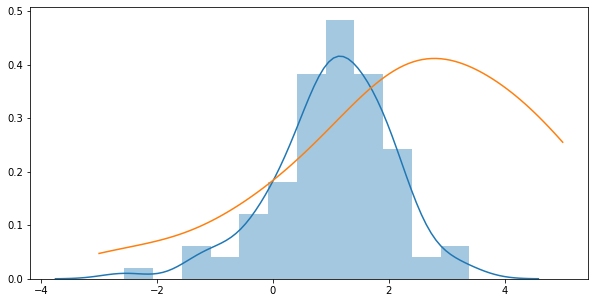

In [156]:

def kGauss(x, x_k, h):
    #return (1/np.sqrt(2*np.pi*(h**2)))*np.exp(-(((x-x_k)/h)**2)/2)
    return np.exp(-(((x-x_k)/h)**2)/2)/np.sqrt(2*np.pi*(h**2))
    #return np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))
def kernel_lei(x):
    return np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))

def kde(x, data=data, h=0):
    K_sum = 0
    for x_k in data: 
        print(x_k)
        #K_sum += kGauss(x, x_k, h)
        K_sum += kernel_lei((x-x_k/h))
        #print(K_sum)
    return K_sum / (data.size * h)
    #return [ mean(array([ kGauss(y, u, h) for u in data ])) for y in x ]

t = linspace(-3, 5, 100)
lei_sol = LA.norm(data-np.mean(data))**2/data.size
h = 1.06*((data.size)**(-1./5))*lei_sol
#h = 1.06(*std(data)*n**(-1./5))
#print(kde(t, data=data, h=h))
plt.figure(figsize=(10,5))
#plt.plot(t, kde(t, data=data, h=10*h))
#plt.plot(t, kde(t, data=data, h=h))
#plt.plot(t, kde(t, data=data, h=.1*h))
#plt.hist(data, bins=20, normed=True, )

sns.distplot(data)
plt.plot(t, kde(t, data=data, h=h))

In [107]:
x

NameError: name 'x' is not defined

## II - Kernel regression

Assume a pair $(X,Y)$ of random variables, with $p(x)\sim\mathcal{U}_{[-3,3]}$ and $p(y\vert x)\sim\mathcal{N}(x^2+\exp(-x),10\cos^2x)$. 

> Implement the kernel approximation of the regression curve $\mathbb{E}[Y\vert X=x]$ and of linear regression. Test your code with sample size $n=10^4$.

In [ ]:
from pylab import *
%matplotlib inline

In [ ]:
...

## III - KNN

We consider 2D data generated using the code below. Each line of dataX and dataY represents points form a distinct class

    ns  = 200  # number of samples per class
    nc = 3    # number of classes
    dataX  = zeros(shape=(nc,ns))
    dataY  = zeros(shape=(nc,ns))
    dataX[0,:]  = randn(ns)
    dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
    dataX[1,:]  = -1 + .5*randn(ns)
    dataY[1,:]  =  1 + .5*randn(ns)
    dataX[2,:]  =  1 + .5*randn(ns)
    dataY[2,:]  = -1 + .5*randn(ns)

> 1. Visualize data and their class using a scatter plot.
> 2. Discretize the area $[-3,3]\times[-3,3]$ with 100 points per axis. For each point, compute the minimum surface $Z_{ij}=S(X_{ij},Y_{ij})$ of the disk that encloses the K nearest neighbors and represent a contour plot of $Z$
> 3. For each point of the surface, compute the posterior probabilities of the classes and plot the posterior probability map for each class. 
> 4. Plot the decision map for the class that supplies the decided class for each point based on posterior probability maximization.


Note: you could alternatively use scikit learn (https://scikit-learn.org/stable/modules/neighbors.html)

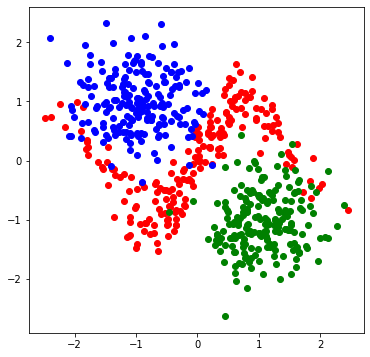

In [53]:
ns  = 200  # number of samples per class
nc = 3    # number of classes
dataX  = zeros(shape=(nc,ns))
dataY  = zeros(shape=(nc,ns))
dataX[0,:]  = randn(ns)
dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
dataX[1,:]  = -1 + .5*randn(ns)
dataY[1,:]  =  1 + .5*randn(ns)
dataX[2,:]  =  1 + .5*randn(ns)
dataY[2,:]  = -1 + .5*randn(ns)

plt.figure(figsize=(6,6))
plt.scatter(dataX[0,:], dataY[0,:],color='r')
plt.scatter(dataX[1,:], dataY[1,:],color='b')
plt.scatter(dataX[2,:], dataY[2,:],color='g')

In [ ]:
...

In [ ]:
...

## IV - Kernel methods with scikit-learn

We illustrate the use of scikit-learn for kernel density estimation by considering a simple example.

> 1. generate a set of data that contains $2.10^4$ samples with $\mathcal{N}(0,100)$ distribution, $10^4$ samples with $\mathcal{N}(3,1)$ distribution and $10^4$ samples with $\mathcal{N}(2,4)$ distribution.
> 2. Plot the kernel density estimator obtained using the **KernelDensity** function of scikit-learn.


Note that you could also use scikit learn for KNN estimation in setion III (https://scikit-learn.org/stable/modules/neighbors.html)

In [ ]:
from pylab import *
%matplotlib inline

from sklearn.neighbors import KernelDensity
import scipy.stats as st

In [ ]:
...